### Read training, dev and unlabeled test data


The following provides a starting code (Python 3) of how to read the labeled training and dev cipher text, and unlabeled test cipher text, into lists.


In [10]:
train, dev, test = [], [], []

In [11]:
for x in open('./train_enc.tsv', encoding='utf-8'):
    x = x.rstrip('\n\r').split('\t')
    # x[0] will be the label (0 or 1), and x[1] will be the ciphertext sentence.
    x[0] = int(x[0])
    train.append(x)
print(len(train))
print(train[:3])

16220
[[0, 'lkêcê yoúc cêêö y#êjl lw mówám Újám j Úêê# ütlk Úol lkêú z#ê ctöé8ú ówl xoóóú éê#xw#öê#c .'], [0, '6êcétlê jolêot8 zc éê#xw#öjóáê , tl zc j #jlkê# 8tcl8êcc jöÚ8ê 6wüó lkê öt668ê wx lkê #wj6 , ükê#ê lkê lkêöjltá t#wótêc j#ê lww wÚ2twoc jó6 lkê cê+oj8 éw8tltác lww cöoy .'], [0, 'tx lktc kw8t6jú öw2tê tc coééwcê6 lw Úê j ytxl , cwöêÚw6ú oóü#jééê6 tl êj#8ú , lwwm wol j88 lkê yww6 cloxx , jó6 8êxl Úêktó6 lkê á#jé ( 8tlê#j88ú ) .']]


In [12]:
for x in open('./dev_enc.tsv', encoding='utf-8'):
    x = x.rstrip('\n\r').split('\t')
    # x[0] will be the label (0 or 1), and x[1] will be the ciphertext sentence.
    x[0] = int(x[0])
    dev.append(x)
print(len(dev))
print(dev[:3])

2027
[[1, 'ów8jó Ú#j2ê8ú l#êj6c ükê#ê xêü jöê#tájó xt8öc 6j#ê lw 6ê82ê 77 tólw lkê üw#86 wx jöÚt2j8êóáê jó6 jöÚtyotlú <<<'], [0, 'ê2êó öo#ékú zc ê+éê#l áwötá ltötóy jó6 xjöê6 ákj#tcöj áj ózl #êcáoê lktc êxxw#l .'], [1, 'üt88 jcco#ê68ú #jóm jc wóê wx lkê á8ê2ê#êcl , öwcl 6êáêélt2ê8ú jöoctóy áwöê6têc wx lkê úêj# .']]


#### Different from 'train' and 'dev' that are both list of tuples, 'test' will be just a list.


In [13]:
for x in open('./test_enc_unlabeled.tsv', encoding='utf-8'):
    x = x.rstrip('\n\r')
    test.append(x)
print(len(test))
print(test[:3])

2028
['j 6t6jáltá jó6 6o88 6wáoöêólj#ú y8w#txútóy cwxlüj#ê jój#ákú .', 'ówlktóy cltámc , #êj88ú , ê+áêél j 8tóyê#tóy á#êêétóêcc wóê xêê8c x#wö Úêtóy 6#jyyê6 lk#woyk j cj6 , cw#6t6 oót2ê#cê wx yoóc , 6#oyc , j2j#táê jó6 6jöjyê6 6#êjöc .', 'öo#ékú jó6 üt8cwó jáloj88ú öjmê j é#êllú yww6 lêjö <<< Úol lkê é#wvêál co##woó6tóy lkêö tc 6tcl#êcctóy8ú #wlê .']


#### You can split every sentence into lists of words by white spaces.


In [14]:
train_split = [[x[0], x[1].split(' ')] for x in train]
dev_split = [[x[0], x[1].split(' ')] for x in dev]
test_split = [[x.split(' ')] for x in test]

### Main Code Body


You may choose to experiment with different methods using your program. However, you need to embed the training and inference processes at here. We will use your prediction on the unlabeled test data to grade, while checking this part to understand how your method has produced the predictions.


Load data


In [42]:
import pandas as pd

In [43]:
# Importing the dataset without column headers
DATASET_ENCODING = "utf-8"
train_data = pd.read_csv('./train_enc.tsv', sep='\t',
                         encoding=DATASET_ENCODING, header=None)
dev_data = pd.read_csv('./dev_enc.tsv', sep='\t',
                       encoding=DATASET_ENCODING, header=None)
test_data = pd.read_csv('./test_enc_unlabeled.tsv', sep='\t',
                        encoding=DATASET_ENCODING, header=None)
# Define column headers
DATASET_COLUMNS = ["label", "text"]

# Assign column headers to the DataFrame
train_data.columns = DATASET_COLUMNS
dev_data.columns = DATASET_COLUMNS
test_data.columns = ["text"]
# Display the first few rows of the DataFrame
print(train_data.head())
print(len(train_data))
print(dev_data.head())
print(len(dev_data))
print(test_data.head())
print(len(test_data))

   label                                               text
0      0  lkêcê yoúc cêêö y#êjl lw mówám Újám j Úêê# ütl...
1      0  6êcétlê jolêot8 zc éê#xw#öjóáê , tl zc j #jlkê...
2      0  tx lktc kw8t6jú öw2tê tc coééwcê6 lw Úê j ytxl...
3      1  vocl ükêó úwo lktóm lkjl ê2ê#ú éwcctÚ8ê jóy8ê ...
4      1  yt2ê á#ê6tl lw ê2ê#úwóê x#wö #wÚtócwó 6wüó lw ...
16220
   label                                               text
0      1  ów8jó Ú#j2ê8ú l#êj6c ükê#ê xêü jöê#tájó xt8öc ...
1      0  ê2êó öo#ékú zc ê+éê#l áwötá ltötóy jó6 xjöê6 á...
2      1  üt88 jcco#ê68ú #jóm jc wóê wx lkê á8ê2ê#êcl , ...
3      1  tl kjc j ájxxêtójlê6 , c8wééú Ú#t88tjóáê , céj...
4      1  lww öoák wx clw#úlê88tóy öw2êc jüjú x#wö cw8wó...
2027
                                                text
0  j 6t6jáltá jó6 6o88 6wáoöêólj#ú y8w#txútóy cwx...
1  ówlktóy cltámc , #êj88ú , ê+áêél j 8tóyê#tóy á...
2  öo#ékú jó6 üt8cwó jáloj88ú öjmê j é#êllú yww6 ...
3  lkê xt8ö üjc é#w6oáê6 Úú vê##ú Ú#oámkêtöê# jó6...
4   

In [44]:
from datasets import Dataset
train_dataset = Dataset.from_pandas(train_data)
dev_dataset = Dataset.from_pandas(dev_data)

Tokenization


In [45]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [46]:
def preprocess_function(dataset):
    return tokenizer(dataset["text"], truncation=True)

In [47]:
tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_dev = dev_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/16220 [00:00<?, ? examples/s]

Map:   0%|          | 0/2027 [00:00<?, ? examples/s]

In [48]:
print(tokenized_train[0])

{'label': 0, 'text': 'lkêcê yoúc cêêö y#êjl lw mówám Újám j Úêê# ütlk Úol lkêú z#ê ctöé8ú ówl xoóóú éê#xw#öê#c .', 'input_ids': [101, 1048, 3489, 3401, 2017, 2278, 8292, 8780, 1061, 1001, 1041, 3501, 2140, 1048, 2860, 9587, 4213, 2213, 1057, 3900, 2213, 1046, 1057, 4402, 1001, 21183, 13687, 1057, 4747, 1048, 3489, 2226, 1062, 1001, 1041, 14931, 8913, 2620, 2226, 13547, 1060, 9541, 7140, 25212, 1001, 1060, 2860, 1001, 1051, 2063, 1001, 1039, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [52]:
import evaluate
import numpy as np
from transformers import DataCollatorWithPadding

In [53]:
collator = DataCollatorWithPadding(
    tokenizer=tokenizer, return_tensors="tf")
accuracy = evaluate.load("accuracy")

In [54]:
def compute_metrics(eval_prediction):
    predictions, labels = eval_prediction
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [55]:
id_label = {0: "NEGATIVE", 1: "POSITIVE"}
label_id = {"NEGATIVE": 0, "POSITIVE": 1}

In [56]:
print(len(tokenized_train))
print(len(tokenized_dev))

16220
2027


Load pretrained Bert model


In [57]:
from transformers import create_optimizer
import tensorflow as tf

batch_size = 16
epochs = 10
batches_per_epoch = len(tokenized_train) // batch_size
total_steps = int(batches_per_epoch * epochs)
optimizer, schedule = create_optimizer(
    init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_steps)

In [58]:
from transformers import TFAutoModelForSequenceClassification

bertModel = TFAutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2, id2label=id_label, label2id=label_id
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [59]:
tf_train_set = bertModel.prepare_tf_dataset(
    tokenized_train,
    shuffle=True,
    batch_size=16,
    collate_fn=collator,
)

tf_dev_set = bertModel.prepare_tf_dataset(
    tokenized_dev,
    shuffle=False,
    batch_size=16,
    collate_fn=collator,
)

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [60]:
bertModel.compile(optimizer=optimizer)  # No loss argument!

Set Callbacks


In [62]:
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from transformers.keras_callbacks import KerasMetricCallback

metric_callback = KerasMetricCallback(
    metric_fn=compute_metrics, eval_dataset=tf_dev_set)
callbacks = [metric_callback, ReduceLROnPlateau(monitor='val_loss', patience=3, cooldown=0),
             EarlyStopping(monitor='accuracy', min_delta=1e-6, patience=3)]

Fine-tune model


In [63]:
history = bertModel.fit(x=tf_train_set, validation_data=tf_dev_set,
                        epochs=10, callbacks=callbacks, verbose=1)

Epoch 1/10
1013/1013 [==============================] - 1767s 2s/step - loss: 0.6587 - val_loss: 0.5673 - accuracy: 0.7020 - lr: 1.8002e-05
Epoch 2/10
1013/1013 [==============================] - 1766s 2s/step - loss: 0.5409 - val_loss: 0.4695 - accuracy: 0.7874 - lr: 1.6002e-05
Epoch 3/10
1013/1013 [==============================] - 1792s 2s/step - loss: 0.4141 - val_loss: 0.4369 - accuracy: 0.8219 - lr: 1.4002e-05
Epoch 4/10
1013/1013 [==============================] - 1825s 2s/step - loss: 0.3113 - val_loss: 0.4048 - accuracy: 0.8382 - lr: 1.2002e-05
Epoch 5/10
1013/1013 [==============================] - 1781s 2s/step - loss: 0.2245 - val_loss: 0.4031 - accuracy: 0.8614 - lr: 1.0002e-05
Epoch 6/10
1013/1013 [==============================] - 1769s 2s/step - loss: 0.1734 - val_loss: 0.4289 - accuracy: 0.8653 - lr: 8.0020e-06
Epoch 7/10
1013/1013 [==============================] - 1767s 2s/step - loss: 0.1314 - val_loss: 0.4538 - accuracy: 0.8781 - lr: 6.0020e-06
Epoch 8/10
1013/1013

Save model


In [68]:
from transformers import AutoModelForSequenceClassification

# Assuming `model` is your custom model
bertModel.save_pretrained("bertmodel")
# Assuming `tokenizer` is your custom tokenizer
tokenizer.save_pretrained("berttokenizer")

('berttokenizer/tokenizer_config.json',
 'berttokenizer/special_tokens_map.json',
 'berttokenizer/vocab.txt',
 'berttokenizer/added_tokens.json',
 'berttokenizer/tokenizer.json')

In [69]:
from transformers import AutoTokenizer

loaded_tokenizer = AutoTokenizer.from_pretrained("berttokenizer")

Load Stored Bert Model and Tokenizer


In [71]:
from transformers import AutoModelForSequenceClassification, pipeline

# Replace with the path to your local model directory
model_path = "bertmodel"
model = AutoModelForSequenceClassification.from_pretrained(
    model_path,  from_tf=True)

classifier = pipeline("sentiment-analysis", model=model,
                      tokenizer=loaded_tokenizer)

All TF 2.0 model weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use DistilBertForSequenceClassification for predictions without further training.


In [72]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'val_loss', 'accuracy', 'lr'])


In [73]:
# Eventually, results need to be a list of 2028 0 or 1's
results = []
for t in test_data["text"]:
    prediction = classifier(t)
    if prediction[0]['label'] == 'NEGATIVE':
        results.append(0)
    else:
        results.append(1)

In [74]:
print(results)

[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 

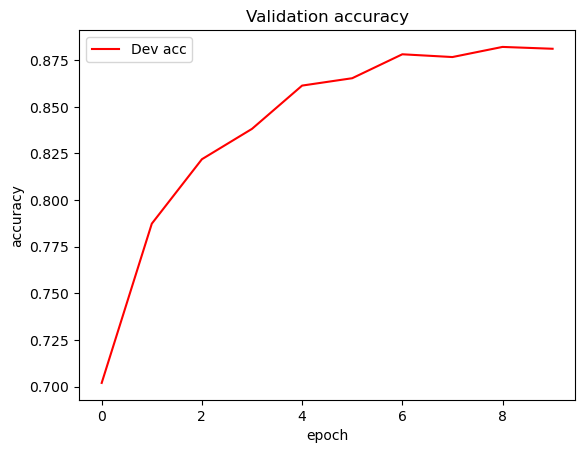

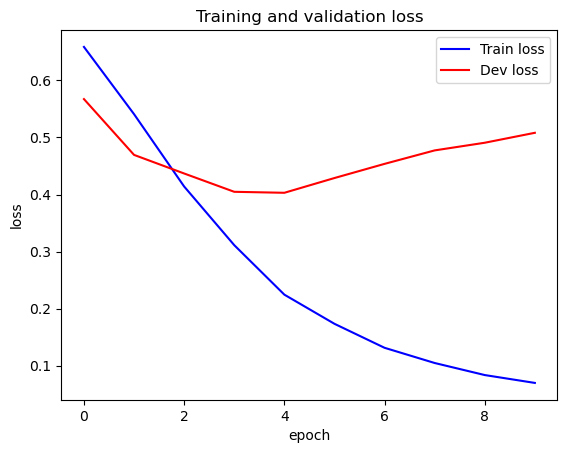

In [75]:
import matplotlib.pyplot as plt
val_acc = history.history['accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(val_acc))

plt.plot(epochs, val_acc, 'r', label='Dev acc')
plt.title('Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Dev loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

Check Dev Data


In [76]:
results1 = []
for d in dev_data["text"]:
    prediction = classifier(d)
    if prediction[0]['label'] == 'NEGATIVE':
        results1.append(0)
    else:
        results1.append(1)

In [77]:
acc_c = 0
for i, element in enumerate(dev_data["label"]):
    if element == results1[i]:
        acc_c += 1

In [78]:
print(acc_c/len(dev_data))

0.8811050814010853


### Output Prediction Result File


You will need to submit a prediction result file. It should have 2028 lines, every line should be either 0 or 1, which is your model's prediction on the respective test set instance.


In [79]:
# suppose you had your model's predictions on the 2028 test cases read from test_enc_unlabeled.tsv, and
# those results are in the list called 'results'
assert (len(results) == 2028)

In [80]:
# make sure the results are not float numbers, but intergers 0 and 1
results = [int(x) for x in results]

In [81]:
# write your prediction results to 'upload_predictions.txt' and upload that later
with open('upload_predictions.txt', 'w', encoding='utf-8') as fp:
    for x in results:
        fp.write(str(x) + '\n')